# Experiment results Kalman Filter

In [24]:
#Preliminary imports
import dfm_tools as dfmt
import xarray as xr
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 330
cm=1/2.54

#### Compare reference run of cut-out with experiment results for the complete RMM 2D

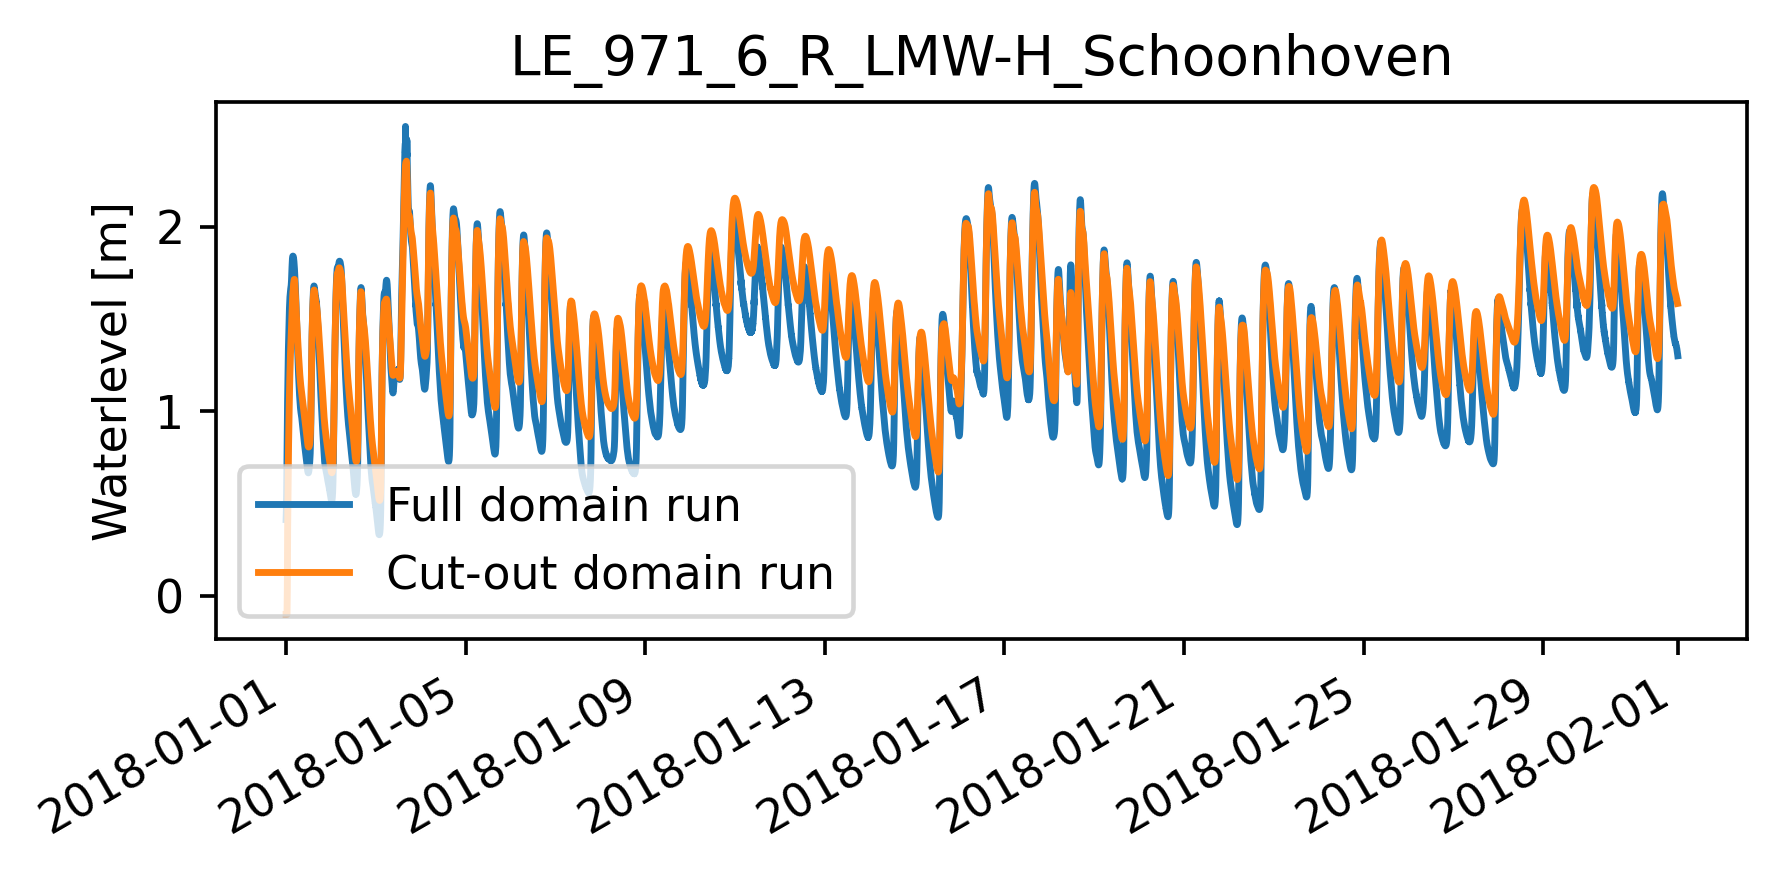

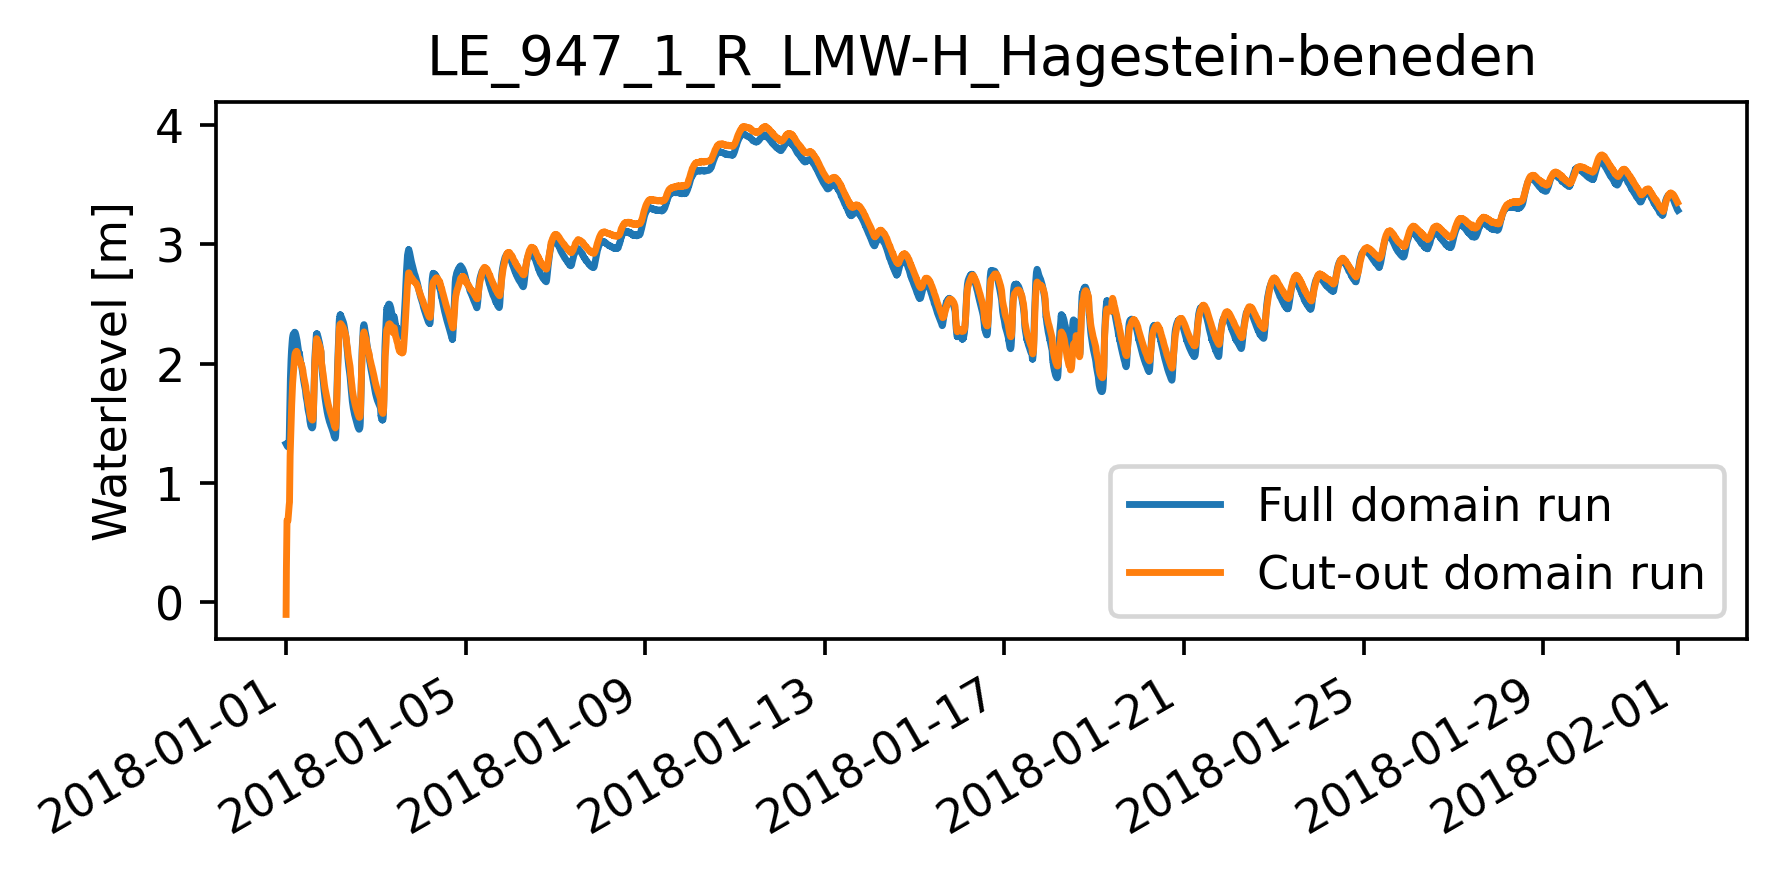

In [25]:
#Set output directory for these files
outputdir = Path(r'p:\11208053-004-kpp2022-rmm1d2d\C_Work\09_Validatie2018_2020\dflowfm2d-rmm_vzm-j19_6-v2d\computations\validation\KalmanFilterDischarge\Experiment_Outputs\Simulation_Discharge_Noise_0\Figures')

#Load hisfiles from full model and plot waterlevels for relevant stations
his_full_model = xr.open_mfdataset(r'p:\11208053-004-kpp2022-rmm1d2d\C_Work\09_Validatie2018_2020\dflowfm2d-rmm_vzm-j19_6-v2d\computations\validation\2018_Validation_run_1_entire_period\results\RMM_VZM_0000_wl_his.nc',
                                        preprocess = dfmt.preprocess_hisnc)
his_reference_model = xr.open_mfdataset(r'..\Experiment_Outputs\Simulation_Discharge_Noise_0\work0\results\full_RMM_VZM_his.nc',
                                        preprocess = dfmt.preprocess_hisnc)         

plot_stations_reference = ['LE_971_6_R_LMW-H_Schoonhoven', 
                 'LE_947_1_R_LMW-H_Hagestein-beneden']

plot_stations_full = ['LE_971.6_R_LMW-H_Schoonhoven', 
                 'LE_947.1_R_LMW-H_Hagestein-beneden']

for iStation, station in enumerate(plot_stations_reference):
    fig, ax = plt.subplots(1,1, figsize = (14*cm, 7*cm))
    his_full_model['waterlevel'].sel(stations=plot_stations_full[iStation]).sel(time='2018-01').plot(ax=ax, label='Full domain run')
    his_reference_model['waterlevel'].sel(stations=station).sel(time='2018-01').plot(ax=ax, label='Cut-out domain run')
    ax.set_ylabel('Waterlevel [m]')
    ax.set_xlabel('')
    ax.set_title(station)
    plt.legend()
    plt.tight_layout()
    plt.savefig(outputdir / f'Waterlevel_Timeseries_Comparison_Full_Model_{station}.png')